In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
def plot_topic_evolution(start_topic, end_topic):
    selected_topics = list(range(start_topic, end_topic + 1))
    selected_topic_evolution = topic_evolution[selected_topics]
    
    cumulative_topic_evolution = selected_topic_evolution.cumsum()
    
    max_appearance = cumulative_topic_evolution.max()
    cumulative_topic_evolution_normalized = cumulative_topic_evolution.div(max_appearance)
    
    cumulative_topic_evolution_normalized.plot(kind='line', figsize=(15, 8))
    plt.title(f'Normalized Cumulative Appearance of Assigned Topics {start_topic} to {end_topic} Over Time')
    plt.xlabel('Release Date')
    plt.ylabel('Normalized Cumulative Proportion of Topics')
    plt.legend(title='Assigned Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


In [20]:
summaries_war3 = pd.read_csv("data/cleaned_data/updated_war_action_movies_with_person_topics.csv")
summaries_war3.dropna(subset=['release_date'], inplace=True)
summaries_war3 = summaries_war3[summaries_war3['country'] == 'United States of America']
summaries_war3.shape


(9782, 11)

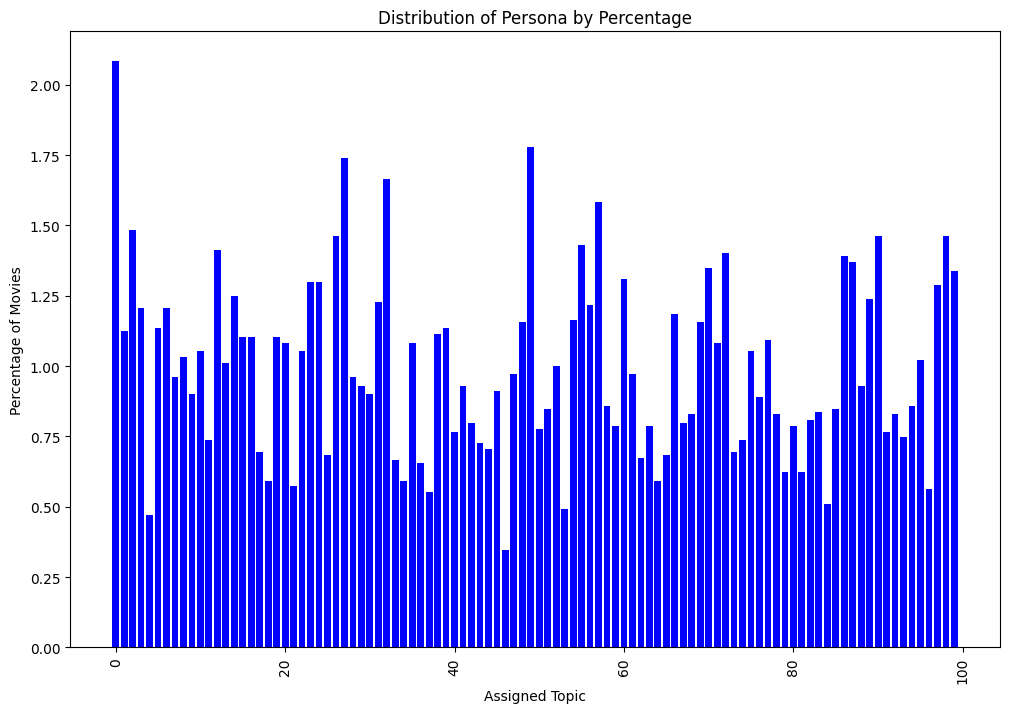

In [21]:
topic_counts = summaries_war3['assigned_topic'].value_counts().sort_index()
topic_percentages = (topic_counts / topic_counts.sum()) * 100

plt.figure(figsize=(12, 8))
plt.bar(topic_percentages.index, topic_percentages.values, color='blue')
plt.xlabel('Assigned Topic')
plt.ylabel('Percentage of Movies')
plt.title('Distribution of Persona by Percentage')
plt.xticks(rotation=90)
plt.show()

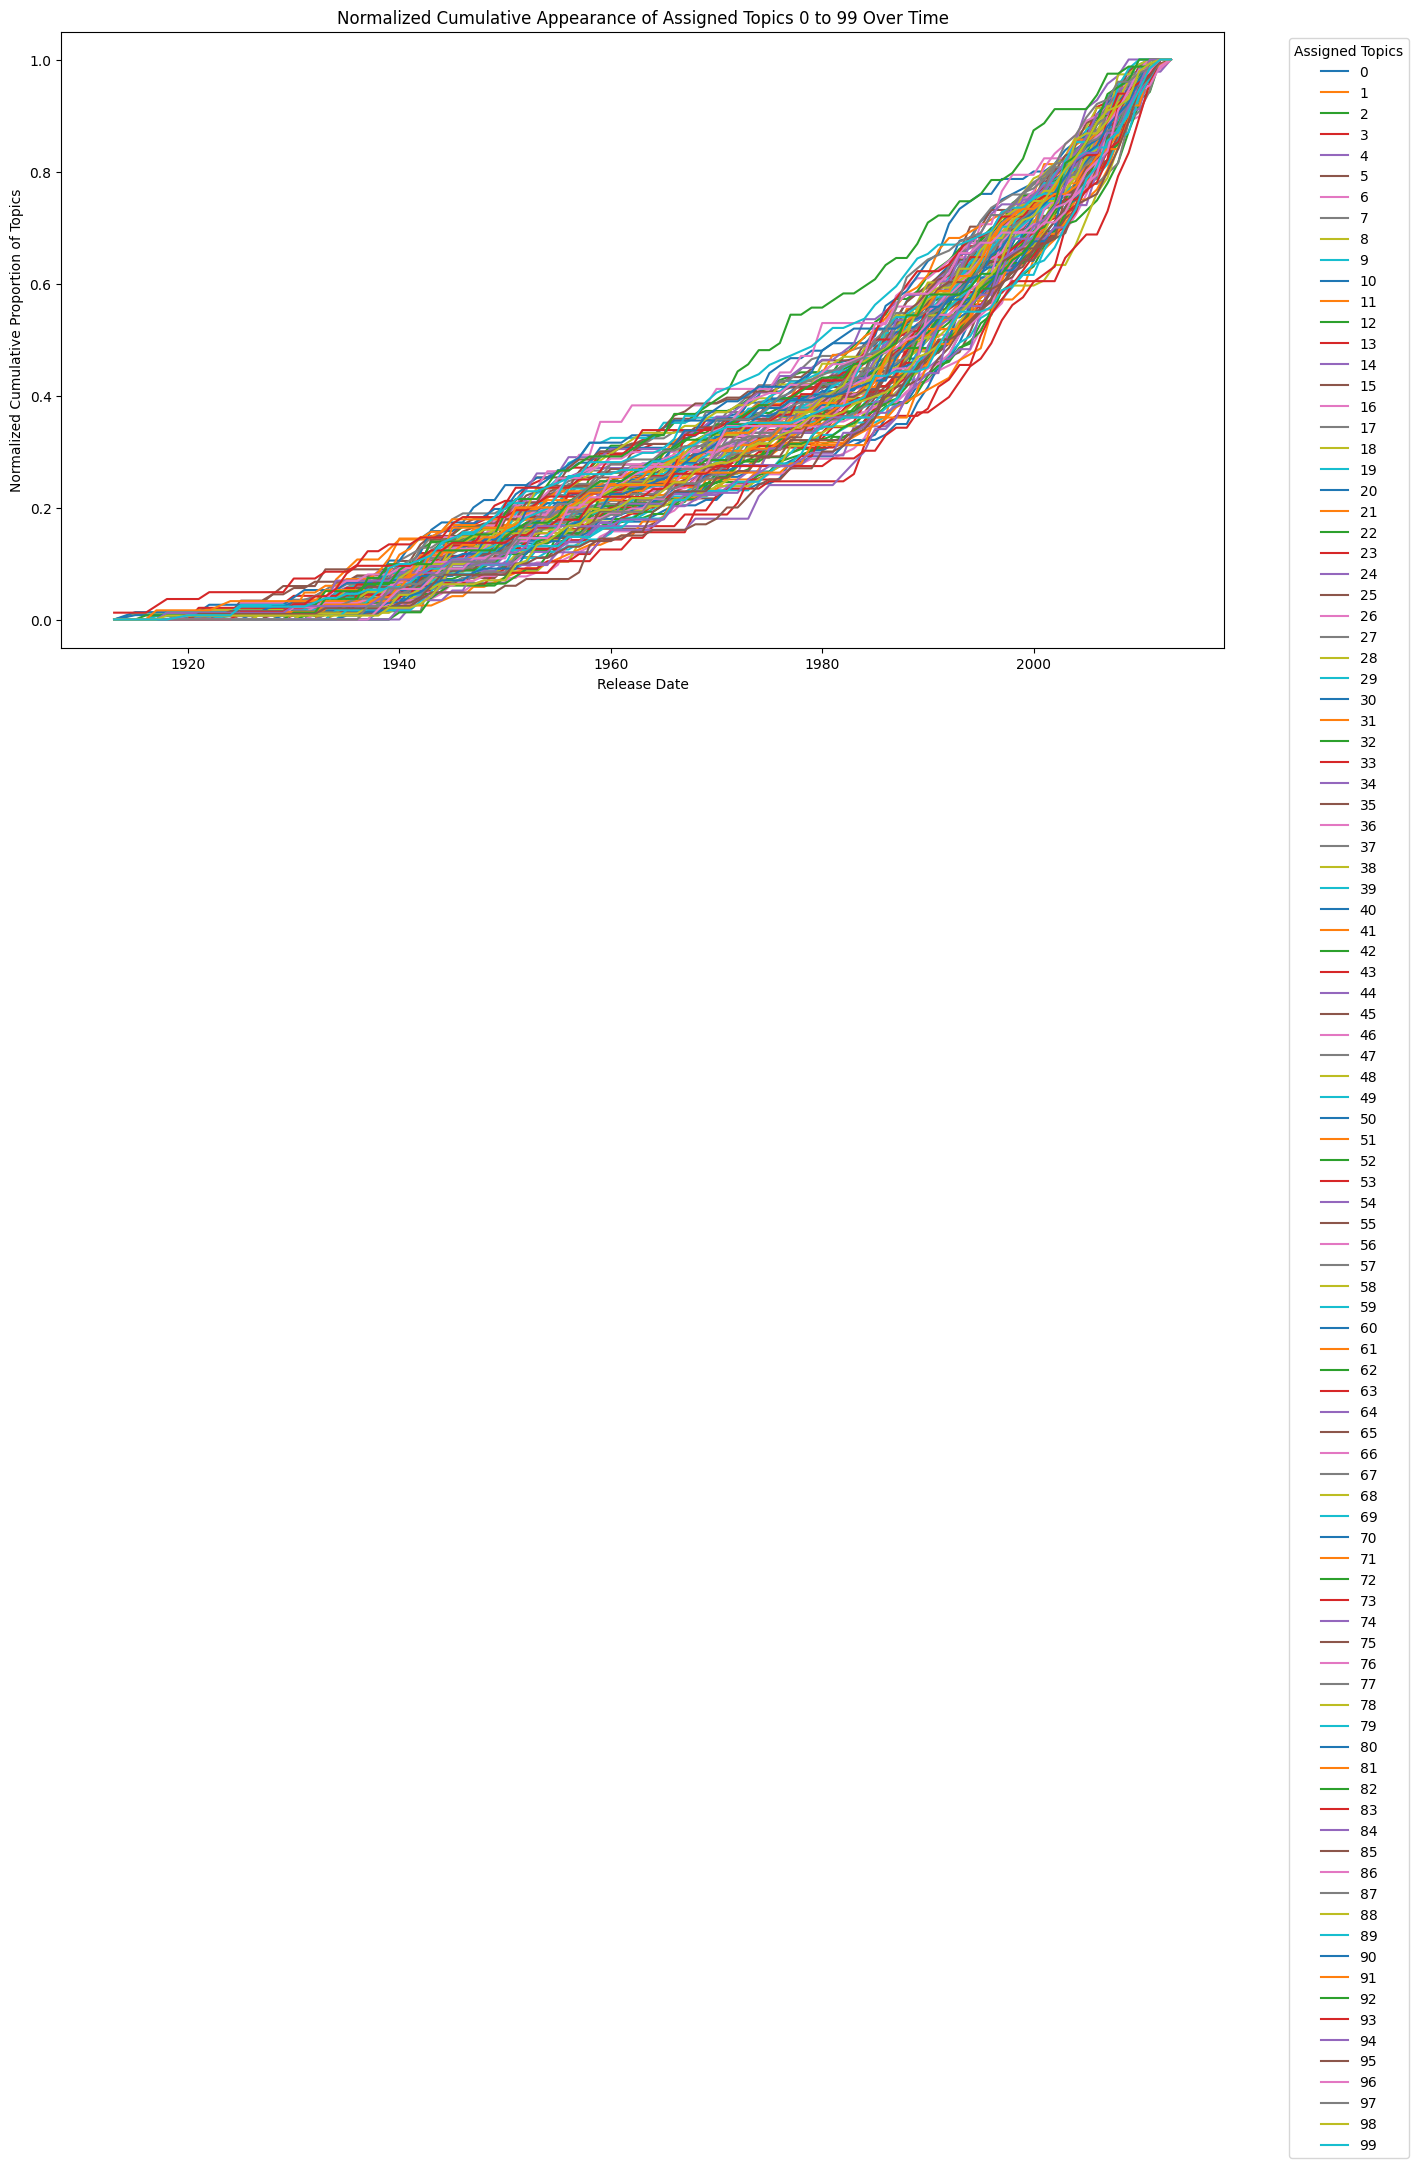

In [22]:

topic_evolution = summaries_war3.pivot_table(index='release_date', columns='assigned_topic', aggfunc='size', fill_value=0)



plot_topic_evolution(0, 99)


In [24]:

war_action_movies_df = pd.read_csv('data/cleaned_data/war_action_movies_data.csv')

war_action_movies_df = war_action_movies_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
war_action_movies_df = war_action_movies_df[war_action_movies_df['country'].str.contains('united states of america', case=False, na=False)]


C:\Users\valbi\AppData\Local\Temp\ipykernel_21968\730612660.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  war_action_movies_df = war_action_movies_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


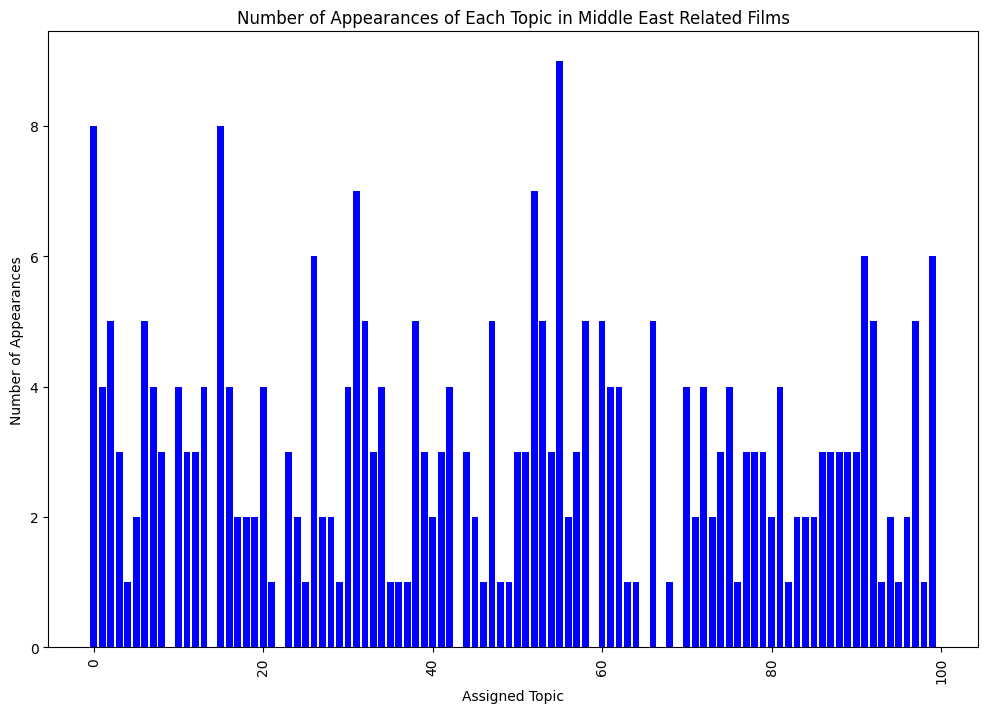

In [26]:
# Filter summaries_war3 to include only the films that are in middle_east_related_movies_df
keywords = ['iran', 'iraq', 'afghanistan', 'syria', 'arabic', 'middle east']
middle_east_related_movies_df = war_action_movies_df[war_action_movies_df['plot'].str.contains('|'.join(keywords), case=False, na=False)]

middle_east_related_summaries = summaries_war3[summaries_war3['name'].str.lower().isin(middle_east_related_movies_df['name'])]

# Count the number of appearances of each topic in the filtered dataframe
middle_east_topic_counts = middle_east_related_summaries['assigned_topic'].value_counts().sort_index()

# Plot the histogram
plt.figure(figsize=(12, 8))
plt.bar(middle_east_topic_counts.index, middle_east_topic_counts.values, color='blue')
plt.xlabel('Assigned Topic')
plt.ylabel('Number of Appearances')
plt.title('Number of Appearances of Each Topic in Middle East Related Films')
plt.xticks(rotation=90)
plt.show()

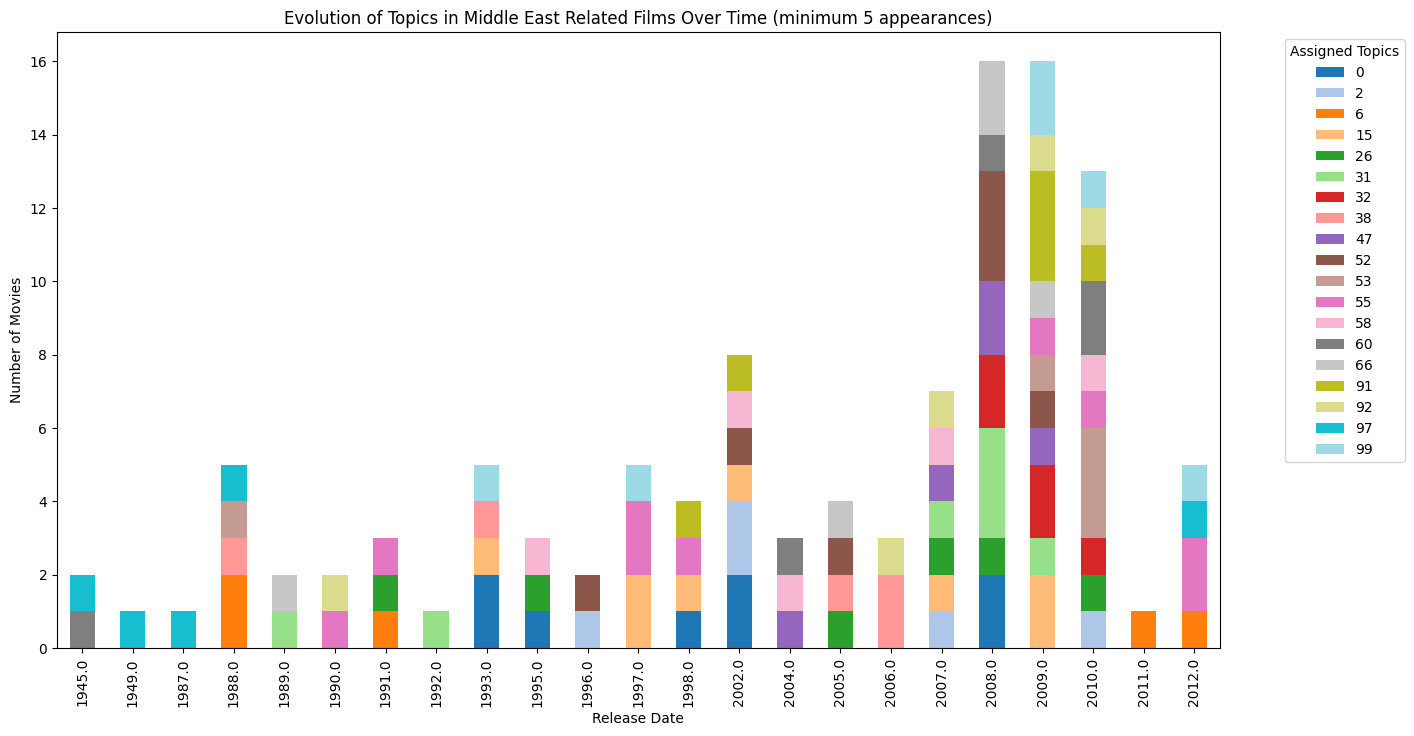

In [27]:
sns.set_palette("tab20")

filtered_topics = middle_east_topic_counts[middle_east_topic_counts >= 5].index

filtered_topic_evolution = middle_east_related_summaries[middle_east_related_summaries['assigned_topic'].isin(filtered_topics)]
filtered_topic_evolution = filtered_topic_evolution.pivot_table(index='release_date', columns='assigned_topic', aggfunc='size', fill_value=0)

filtered_topic_evolution.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='tab20')
plt.xlabel('Release Date')
plt.ylabel('Number of Movies')
plt.title('Evolution of Topics in Middle East Related Films Over Time (minimum 5 appearances)')
plt.legend(title='Assigned Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


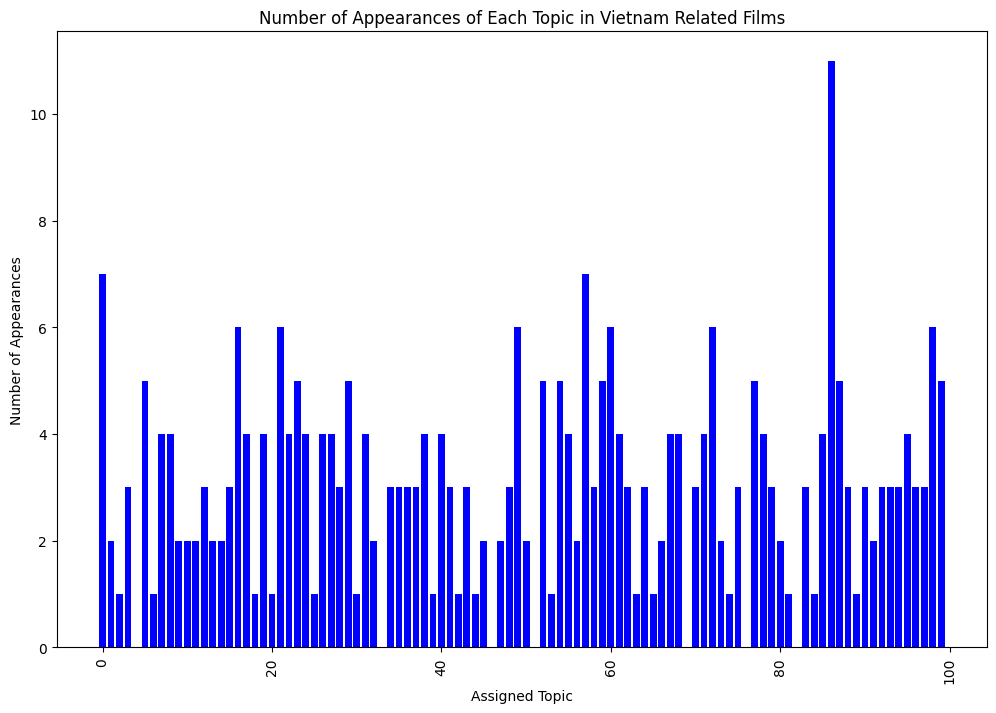

In [28]:
keywords = ['vietnam', 'viet cong', 'saigon', 'hanoi', 'vietminh']
vietnam_related_movies_df = war_action_movies_df[war_action_movies_df['plot'].str.contains('|'.join(keywords), case=False, na=False)]
vietnam_related_summaries = summaries_war3[summaries_war3['name'].str.lower().isin(vietnam_related_movies_df['name'])]

vietnam_topic_counts = vietnam_related_summaries['assigned_topic'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
plt.bar(vietnam_topic_counts.index, vietnam_topic_counts.values, color='blue')
plt.xlabel('Assigned Topic')
plt.ylabel('Number of Appearances')
plt.title('Number of Appearances of Each Topic in Vietnam Related Films')
plt.xticks(rotation=90)
plt.show()

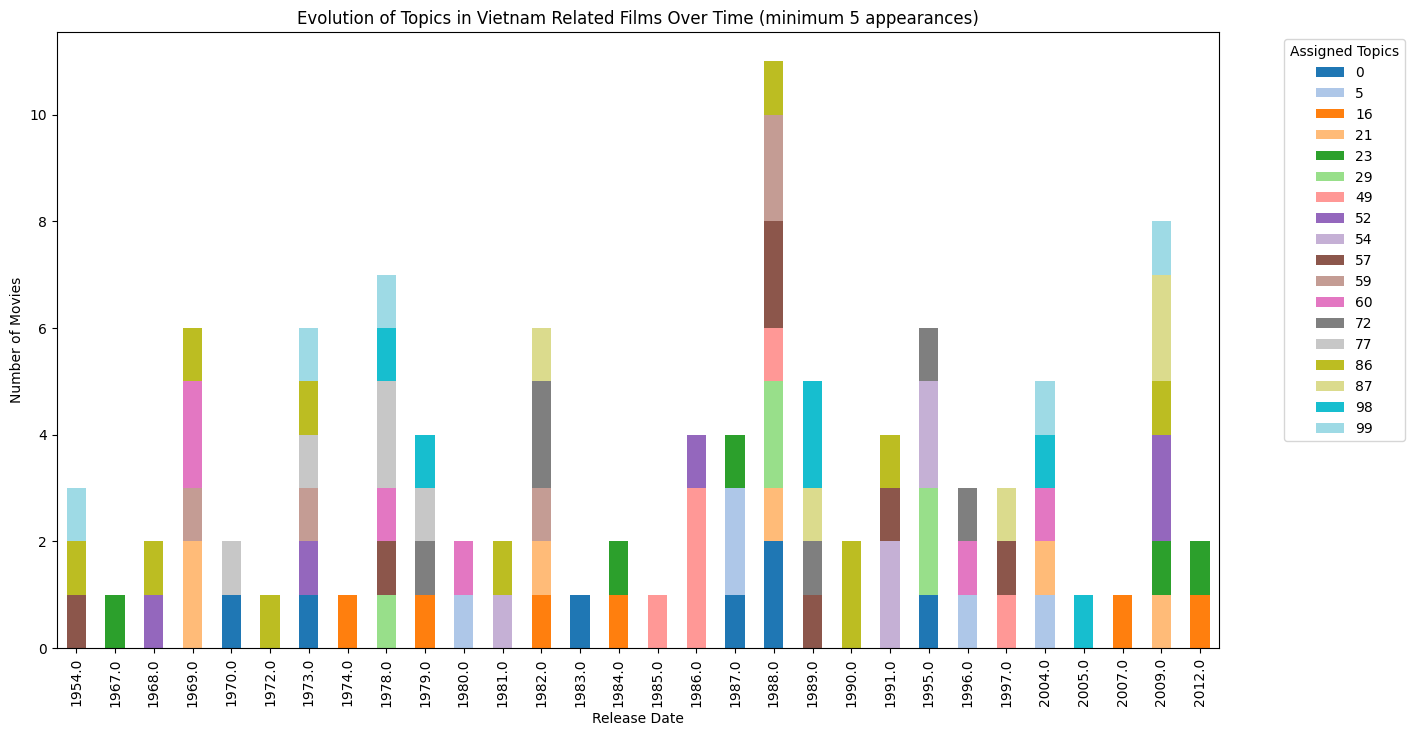

In [29]:
sns.set_palette("tab20")

filtered_topics = vietnam_topic_counts[vietnam_topic_counts >= 5].index

filtered_topic_evolution = vietnam_related_summaries[vietnam_related_summaries['assigned_topic'].isin(filtered_topics)]
filtered_topic_evolution = filtered_topic_evolution.pivot_table(index='release_date', columns='assigned_topic', aggfunc='size', fill_value=0)

filtered_topic_evolution.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='tab20')
plt.xlabel('Release Date')
plt.ylabel('Number of Movies')
plt.title('Evolution of Topics in Vietnam Related Films Over Time (minimum 5 appearances)')
plt.legend(title='Assigned Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()